In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
anemia_pres = pd.read_csv('../data/messy/anemia_preescolar5_N2012U.csv', index_col=False)

In [3]:
anemia_child = pd.read_csv('../data/messy/anemia_escolar5_11_N2012.csv', index_col=False,encoding='latin-1')

In [4]:
anemia_teen = pd.read_csv('../data/messy/anemia_adolescente12_19_N2012.csv', index_col=False,encoding='latin-1')

In [5]:
anemia_pres['ANEMIA'].value_counts()

0.0    5841
1.0    1729
Name: ANEMIA, dtype: int64

In [6]:
anemia_child['ANEMIA'].value_counts()

0.0    12404
1.0     1462
Name: ANEMIA, dtype: int64

In [7]:
anemia_teen['anemia'].value_counts()

0.0    10908
1.0      730
Name: anemia, dtype: int64

In [8]:
anemia_pres.isnull().mean()

FOLIO_C     0.000000
INTP        0.000000
ENTIDAD     0.000000
NOM_ENT     0.000469
MUNICI      0.000000
NOM_MUN     0.000469
LOCALI      0.000000
NOM_LOC     0.000469
ALTITUD     0.000469
SEXO        0.000000
HEMCAP      0.049601
FECHA_NA    0.002814
FECHA_VI    0.000000
EDADDIAS    0.000000
EDAD        0.000000
MESES       0.000000
CODE_UPM    0.111984
EST_DIS     0.111984
EST_URB     0.111984
EST_MARG    0.111984
PONDEF      0.111984
EST_VAR     0.111984
AREA        0.000000
REGION      0.000000
AGEB        0.000000
INDICEF     0.000000
AFILIACI    0.000000
NSEDECIL    0.000000
NSEQUINT    0.000000
NSETERCI    0.000000
HB          0.111984
HBAJUSTA    0.112336
ANEMIA      0.112336
dtype: float64

In [9]:
anemia_pres.head()

,FOLIO_C,INTP,ENTIDAD,NOM_ENT,MUNICI,NOM_MUN,LOCALI,NOM_LOC,ALTITUD,SEXO,...,REGION,AGEB,INDICEF,AFILIACI,NSEDECIL,NSEQUINT,NSETERCI,HB,HBAJUSTA,ANEMIA
0,14061452,5,14,Jalisco,98,Tlaquepaque,1,Tlaquepaque,1569.0,1,...,2,1519,1.672565,1,9,5,3,12.2,11.733641,0.0
1,7060841,7,7,Chiapas,65,Palenque,587,El Tenampa,140.0,1,...,4,0219,-2.970953,0,1,1,1,13.4,13.400000,0.0
2,27060949,5,27,Tabasco,5,Comalcalco,24,Francisco I. Madero 2da. Sección,6.0,1,...,4,0148,-2.253719,0,2,1,1,11.6,11.600000,0.0
3,25061903,3,25,Sinaloa,18,Navolato,481,Campo San José,10.0,1,...,2,0560,-3.659110,1,1,1,1,11.3,11.300000,0.0
4,12060682,6,12,Guerrero,19,Copalillo,8,Tlalcozotitlán,571.0,1,...,4,0132,-3.338322,6,1,1,1,11.0,11.000000,0.0


In [10]:
anemia_pres = anemia_pres.dropna(0, how='any')

In [11]:
anemia_pres.isnull().mean()

FOLIO_C     0.0
INTP        0.0
ENTIDAD     0.0
NOM_ENT     0.0
MUNICI      0.0
NOM_MUN     0.0
LOCALI      0.0
NOM_LOC     0.0
ALTITUD     0.0
SEXO        0.0
HEMCAP      0.0
FECHA_NA    0.0
FECHA_VI    0.0
EDADDIAS    0.0
EDAD        0.0
MESES       0.0
CODE_UPM    0.0
EST_DIS     0.0
EST_URB     0.0
EST_MARG    0.0
PONDEF      0.0
EST_VAR     0.0
AREA        0.0
REGION      0.0
AGEB        0.0
INDICEF     0.0
AFILIACI    0.0
NSEDECIL    0.0
NSEQUINT    0.0
NSETERCI    0.0
HB          0.0
HBAJUSTA    0.0
ANEMIA      0.0
dtype: float64

In [12]:
target_count = anemia_pres.ANEMIA.value_counts()
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Proportion: 3.38 : 1


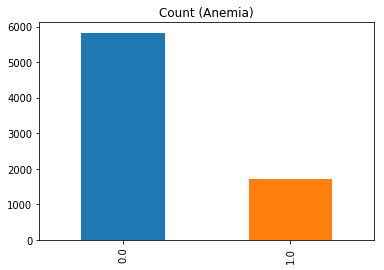

In [13]:
target_count.plot(kind='bar', title='Count (Anemia)');

## Random under-sampling

Random under-sampling:
1.0    1723
0.0    1723
Name: ANEMIA, dtype: int64


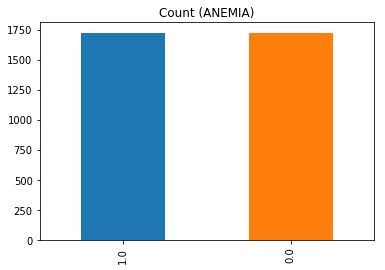

In [21]:
count_class_0, count_class_1 = anemia_pres.ANEMIA.value_counts()

# Divide by class
df_class_0 = anemia_pres[anemia_pres['ANEMIA'] == 0]
df_class_1 = anemia_pres[anemia_pres['ANEMIA'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.ANEMIA.value_counts())

df_test_under.ANEMIA.value_counts().plot(kind='bar', title='Count (ANEMIA)');

In [22]:
df_test_under.head()

,FOLIO_C,INTP,ENTIDAD,NOM_ENT,MUNICI,NOM_MUN,LOCALI,NOM_LOC,ALTITUD,SEXO,...,REGION,AGEB,INDICEF,AFILIACI,NSEDECIL,NSEQUINT,NSETERCI,HB,HBAJUSTA,ANEMIA
5204,14061032,6,14,Jalisco,77,San Martín Hidalgo,9,Jesús María (El Zapote),1436.0,2,...,2,0065,0.488657,6,6,3,2,12.8,12.421441,0.0
4217,25060892,4,25,Sinaloa,6,Culiacán,3141,Bachigualatito,19.0,1,...,2,2621,1.081255,1,8,4,3,11.6,11.600000,0.0
7758,4061162,3,4,Campeche,3,Carmen,6,Atasta,2.0,2,...,4,1494,0.362411,1,6,3,2,13.0,13.000000,0.0
4478,14061092,6,14,Jalisco,82,Sayula,26,Usmajac,1359.0,2,...,2,0351,0.415305,6,6,3,2,12.5,12.170281,0.0
4844,16060973,8,16,Michoacán de Ocampo,69,La Piedad,1,La Piedad de Cabadas,1689.0,2,...,2,0166,1.968220,0,9,5,3,12.0,11.450522,0.0


In [23]:
df_test_under.to_csv('../data/clean/anemia_balanced_pres.csv', index=False)

In [24]:
anemia_balanced_pres = pd.read_csv('../data/clean/anemia_balanced_pres.csv', index_col=False)

In [25]:
anemia_balanced_pres.head()

,FOLIO_C,INTP,ENTIDAD,NOM_ENT,MUNICI,NOM_MUN,LOCALI,NOM_LOC,ALTITUD,SEXO,...,REGION,AGEB,INDICEF,AFILIACI,NSEDECIL,NSEQUINT,NSETERCI,HB,HBAJUSTA,ANEMIA
0,14061032,6,14,Jalisco,77,San Martín Hidalgo,9,Jesús María (El Zapote),1436.0,2,...,2,0065,0.488657,6,6,3,2,12.8,12.421441,0.0
1,25060892,4,25,Sinaloa,6,Culiacán,3141,Bachigualatito,19.0,1,...,2,2621,1.081255,1,8,4,3,11.6,11.600000,0.0
2,4061162,3,4,Campeche,3,Carmen,6,Atasta,2.0,2,...,4,1494,0.362411,1,6,3,2,13.0,13.000000,0.0
3,14061092,6,14,Jalisco,82,Sayula,26,Usmajac,1359.0,2,...,2,0351,0.415305,6,6,3,2,12.5,12.170281,0.0
4,16060973,8,16,Michoacán de Ocampo,69,La Piedad,1,La Piedad de Cabadas,1689.0,2,...,2,0166,1.968220,0,9,5,3,12.0,11.450522,0.0


In [26]:
anemia_balanced_pres.tail()

,FOLIO_C,INTP,ENTIDAD,NOM_ENT,MUNICI,NOM_MUN,LOCALI,NOM_LOC,ALTITUD,SEXO,...,REGION,AGEB,INDICEF,AFILIACI,NSEDECIL,NSEQUINT,NSETERCI,HB,HBAJUSTA,ANEMIA
3441,27060144,5,27,Tabasco,2,Cárdenas,24,Poblado C-28 Coronel Gregorio Méndez Magaña,11.0,2,...,4,0860,-0.724260,0,4,2,1,9.1,9.100000,1.0
3442,3060402,4,3,Baja California Sur,2,Mulegé,66,Guerrero Negro,9.0,2,...,1,3728,0.759009,6,7,4,2,9.6,9.600000,1.0
3443,22061416,3,22,Querétaro,14,Querétaro,92,El Salitre,1841.0,2,...,2,3079,-0.549147,6,4,2,2,10.2,9.539650,1.0
3444,21061760,7,21,Puebla,164,Tepeaca,26,Vicente Guerrero,2291.0,2,...,4,0081,-2.548375,0,1,1,1,11.0,9.971236,1.0
3445,10060355,5,10,Durango,5,Durango,1,Victoria de Durango,1885.0,2,...,1,2295,1.993812,6,9,5,3,11.2,10.506342,1.0


In [27]:
anemia_balanced_pres.isnull().mean()

FOLIO_C     0.0
INTP        0.0
ENTIDAD     0.0
NOM_ENT     0.0
MUNICI      0.0
NOM_MUN     0.0
LOCALI      0.0
NOM_LOC     0.0
ALTITUD     0.0
SEXO        0.0
HEMCAP      0.0
FECHA_NA    0.0
FECHA_VI    0.0
EDADDIAS    0.0
EDAD        0.0
MESES       0.0
CODE_UPM    0.0
EST_DIS     0.0
EST_URB     0.0
EST_MARG    0.0
PONDEF      0.0
EST_VAR     0.0
AREA        0.0
REGION      0.0
AGEB        0.0
INDICEF     0.0
AFILIACI    0.0
NSEDECIL    0.0
NSEQUINT    0.0
NSETERCI    0.0
HB          0.0
HBAJUSTA    0.0
ANEMIA      0.0
dtype: float64